In [1]:
set.seed(42)

In [2]:
ar.process=arima.sim(10000, model=list(ar=c(1/3, 1/2, 7/100)), sd=4)

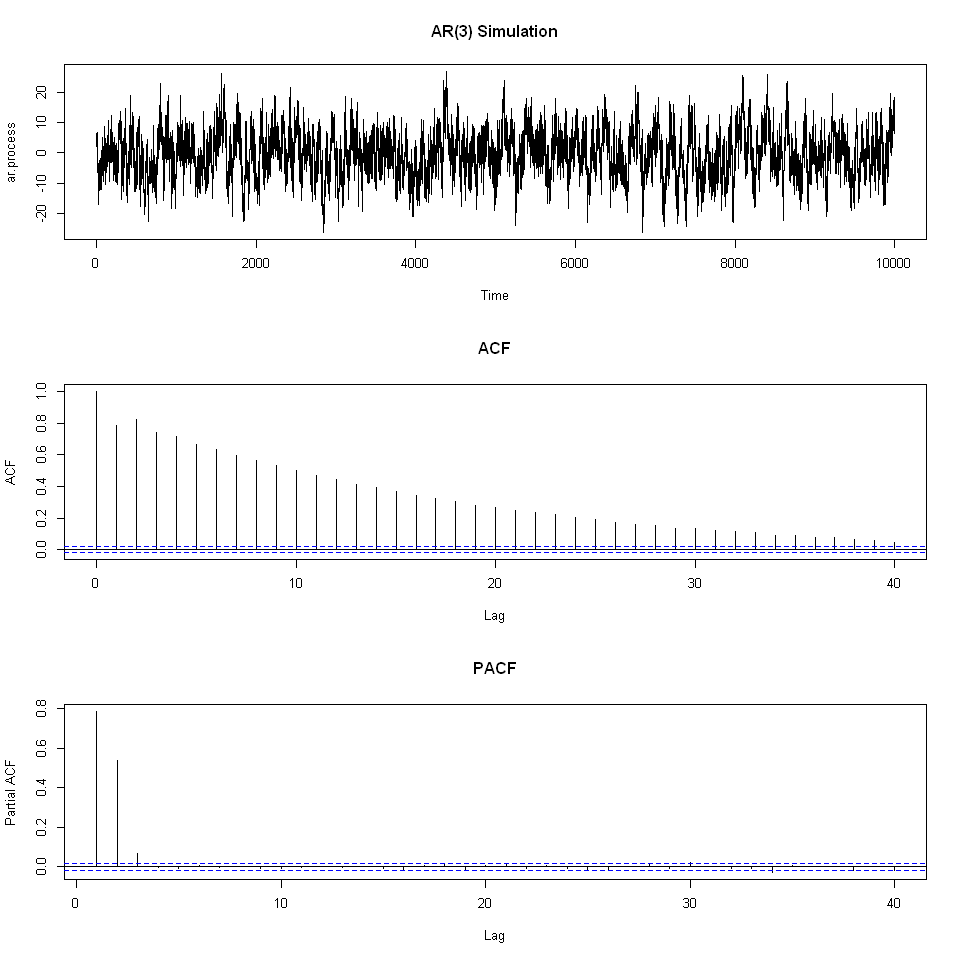

In [3]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(3, 1))
plot(ar.process, main="AR(3) Simulation")
acf(ar.process, main="ACF")
pacf(ar.process, main="PACF")

In [4]:
r <- acf(ar.process, plot=F)$acf[2:4]
r

[1] 0.7849152 0.8224289 0.7392831

In [5]:
R <- matrix(1, 3, 3)
R[1, 2] <- r[1]
R[2, 1] <- r[1]
R[1, 3] <- r[2]
R[3, 1] <- r[2]
R[2, 3] <- r[1]
R[3, 2] <- r[1]
R

1.0000000,0.7849152,0.8224289
0.7849152,1.0000000,0.7849152
0.8224289,0.7849152,1.0000000


In [6]:
b <- matrix(r, nrow=3, ncol=1)
b

0.7849152
0.8224289
0.7392831


In [7]:
phi.hat <- solve(R, b)
phi.hat

0.3259706
0.5124173
0.0689914


In [8]:
c0 <- acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat <- c0 * (1 - sum(phi.hat * r))
sd.hat <- sqrt(var.hat)
sd.hat

[1] 4.022554